In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
np.sqrt(np.finfo(np.float64).eps), np.sqrt(np.finfo(np.float32).eps)

(1.4901161193847656e-08, 0.00034526698)

In [3]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib/keras_ex')
#from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [4]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

In [5]:
lm, model_gkernel = make_model_gkernel2()
print(model_gkernel.inputs[0])
model_gkernel.summary()

W1001 00:01:12.170605 140200454313792 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1001 00:01:12.207410 140200454313792 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1001 00:01:12.216152 140200454313792 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1001 00:01:12.216910 140200454313792 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. P

Tensor("inp:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel2)    (None, 2)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_out = make_model_out()
model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = make_model(nn=4, num_cls=3)
model.summary()

W1001 00:01:12.441688 140200454313792 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 2)                 1         
_________________________________________________________________
model_out (Model)            (None, 3)                 9         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(xtrain, ytrain, epochs=5, verbose=2)

W1001 00:01:12.521881 140200454313792 deprecation.py:323] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
 - 1s - loss: 1.1014 - acc: 0.0667
Epoch 2/5
 - 0s - loss: 1.0990 - acc: 0.3333
Epoch 3/5
 - 0s - loss: 1.0992 - acc: 0.3333
Epoch 4/5
 - 0s - loss: 1.0992 - acc: 0.3333
Epoch 5/5
 - 0s - loss: 1.0995 - acc: 0.3333


In [9]:
pred = model.predict(xtrain)
pred[:5]

array([[0.3279943 , 0.34710094, 0.32490474],
       [0.32799518, 0.34709042, 0.32491434],
       [0.32799366, 0.347113  , 0.32489336],
       [0.3279938 , 0.34710976, 0.32489645],
       [0.32799414, 0.3471044 , 0.32490152]], dtype=float32)

In [10]:
np.random.choice(np.arange(xtrain.shape[0]), 3)

array([41, 58, 59])

## Getting Started

In [11]:
'''
number of landmarks is 3
'''
clf = RBFClassifier(num_lm=3)

In [12]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=500, verbose=0)

CPU times: user 1.17 s, sys: 21.8 ms, total: 1.19 s
Wall time: 1.1 s


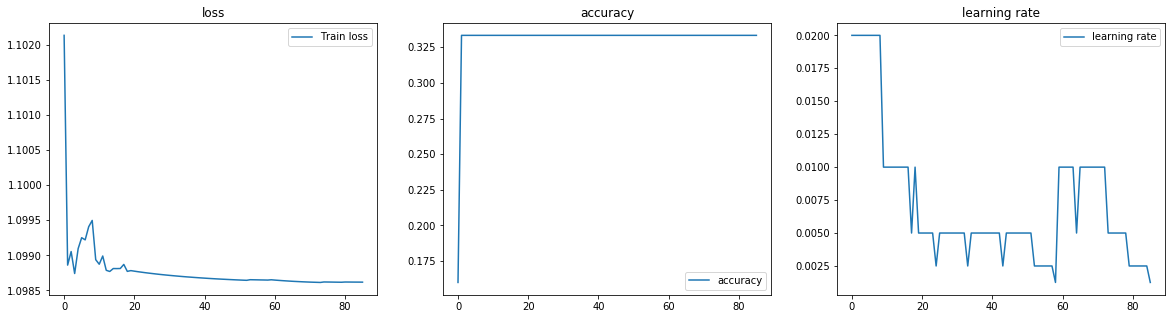

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [14]:
'''
trained gamma
'''
clf.current_gamma()

0.39608708

In [15]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[0.69245124, 0.45302883, 0.45424578, 0.49455875],
       [0.93970644, 0.27226964, 0.41283876, 0.2503702 ],
       [0.7499053 , 0.6618628 , 0.21975636, 0.22547084]], dtype=float32)

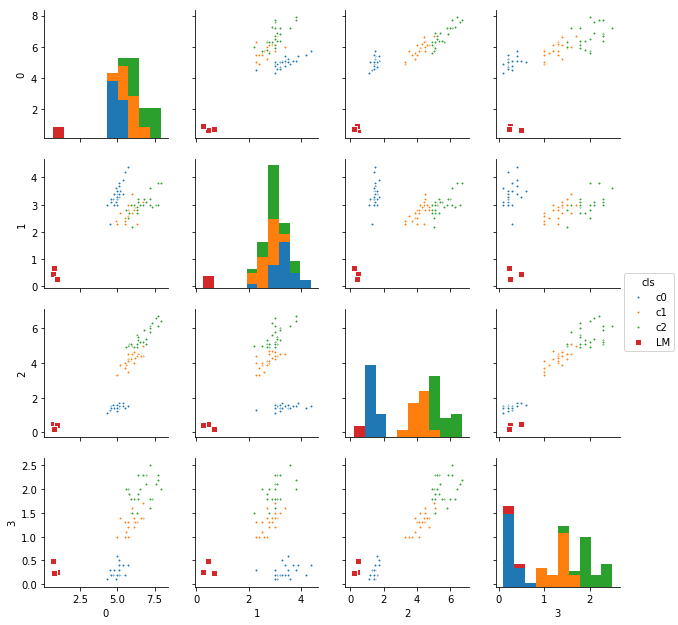

In [16]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [17]:
clf.predict_proba(xtest)[:5]

array([[0.33162758, 0.33344418, 0.33492827],
       [0.33162847, 0.33343983, 0.3349317 ],
       [0.33162764, 0.333444  , 0.33492833],
       [0.33162904, 0.33343995, 0.33493105],
       [0.3316312 , 0.333426  , 0.33494282]], dtype=float32)

In [18]:
pred = clf.predict(xtrain)
pred[:5]

array([2, 2, 2, 2, 2])

In [19]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.16666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        25
           2       0.33      1.00      0.50        25

   micro avg       0.33      0.33      0.33        75
   macro avg       0.11      0.33      0.17        75
weighted avg       0.11      0.33      0.17        75

[[ 0  0 25]
 [ 0  0 25]
 [ 0  0 25]]


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
pred_test = clf.predict(xtest)

In [21]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.16666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        25
           2       0.33      1.00      0.50        25

   micro avg       0.33      0.33      0.33        75
   macro avg       0.11      0.33      0.17        75
weighted avg       0.11      0.33      0.17        75

[[ 0  0 25]
 [ 0  0 25]
 [ 0  0 25]]


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## set landmarks on input x

In [22]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[:3]
)

In [23]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=500, verbose=0)

CPU times: user 10.8 s, sys: 384 ms, total: 11.2 s
Wall time: 8.66 s


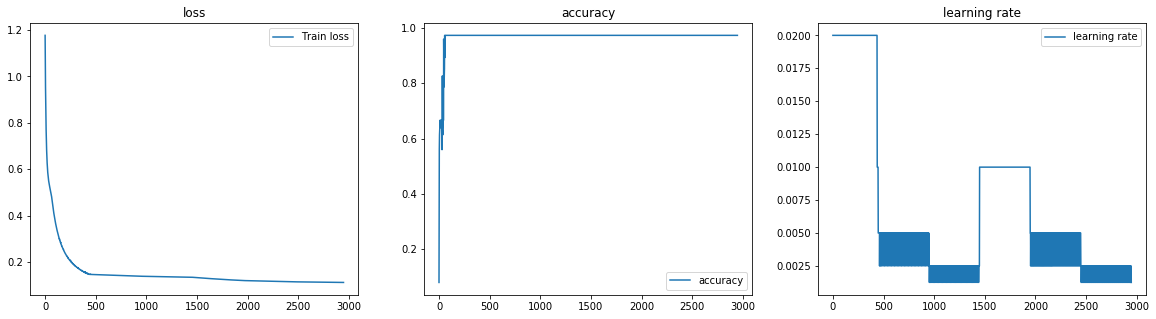

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [25]:
'''
trained gamma
'''
clf.current_gamma()

0.12780337

In [26]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=float32)

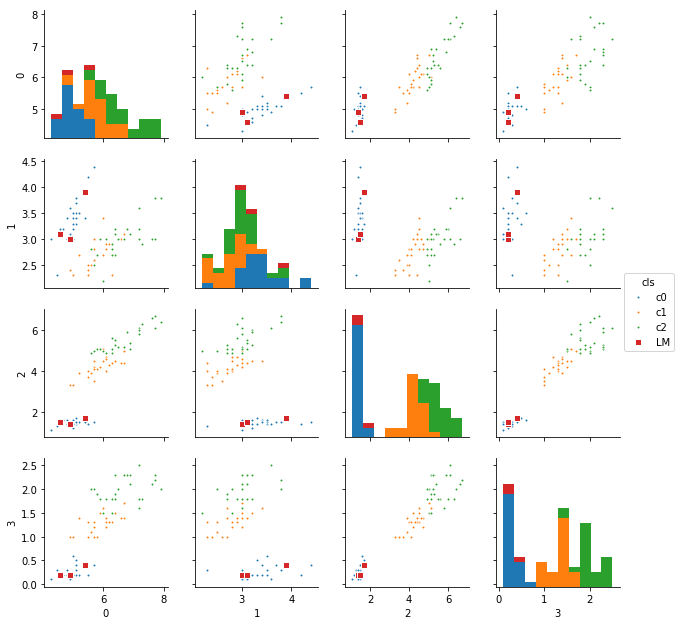

In [27]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [28]:
clf.predict_proba(xtest)[:5]

array([[9.9430919e-01, 5.6907935e-03, 2.8849982e-15],
       [9.9413931e-01, 5.8606691e-03, 7.3912874e-15],
       [9.9394786e-01, 6.0521616e-03, 3.3585468e-15],
       [9.9371570e-01, 6.2843403e-03, 7.1614298e-15],
       [9.8921949e-01, 1.0780468e-02, 9.0399659e-14]], dtype=float32)

In [29]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [30]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [31]:
pred_test = clf.predict(xtest)

In [32]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9198717948717948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.84      0.87        25
           2       0.85      0.92      0.88        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

[[25  0  0]
 [ 0 21  4]
 [ 0  2 23]]


## set landmarks on input x randomly

In [33]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 3, replace=False)]
)

In [34]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=500, verbose=0)

CPU times: user 10.6 s, sys: 347 ms, total: 11 s
Wall time: 8.5 s


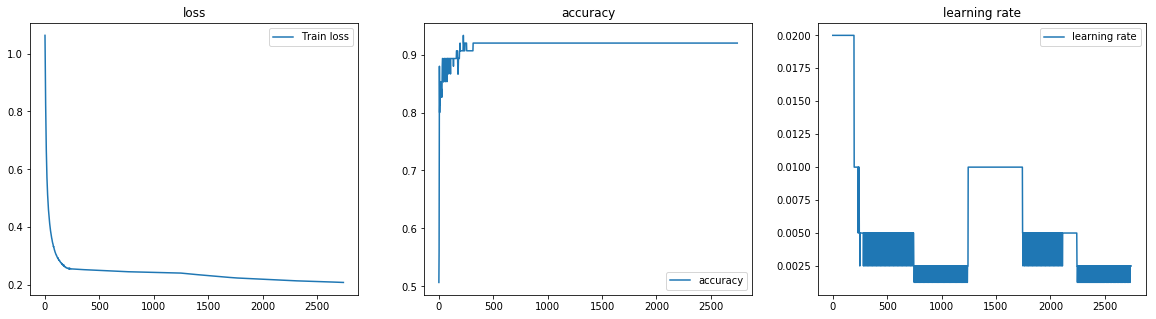

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [36]:
'''
trained gamma
'''
clf.current_gamma()

0.12919061

In [37]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[7.2, 3.2, 6. , 1.8],
       [4.5, 2.3, 1.3, 0.3],
       [6.5, 3. , 5.2, 2. ]], dtype=float32)

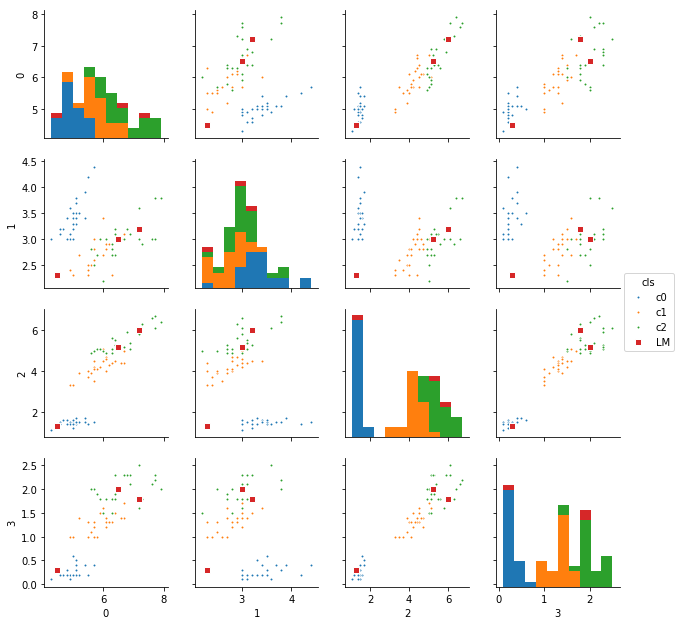

In [38]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [39]:
clf.predict_proba(xtest)[:5]

array([[9.8558271e-01, 1.4415680e-02, 1.6906019e-06],
       [9.9471384e-01, 5.2858079e-03, 3.9495308e-07],
       [9.8460752e-01, 1.5390591e-02, 1.8770095e-06],
       [9.9222118e-01, 7.7781538e-03, 6.8661069e-07],
       [9.9670476e-01, 3.2950563e-03, 1.9701589e-07]], dtype=float32)

In [40]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [41]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9198717948717948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.85      0.92      0.88        25
           2       0.91      0.84      0.87        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

[[25  0  0]
 [ 0 23  2]
 [ 0  4 21]]


In [42]:
pred_test = clf.predict(xtest)

In [43]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.8389694041867956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.81      0.68      0.74        25
           2       0.72      0.84      0.78        25

   micro avg       0.84      0.84      0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75

[[25  0  0]
 [ 0 17  8]
 [ 0  4 21]]


## set landmarks on input x randomly (num_lm = 25)

In [44]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), num_lm)]
)

In [45]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=500, verbose=0)

CPU times: user 6.92 s, sys: 204 ms, total: 7.12 s
Wall time: 5.69 s


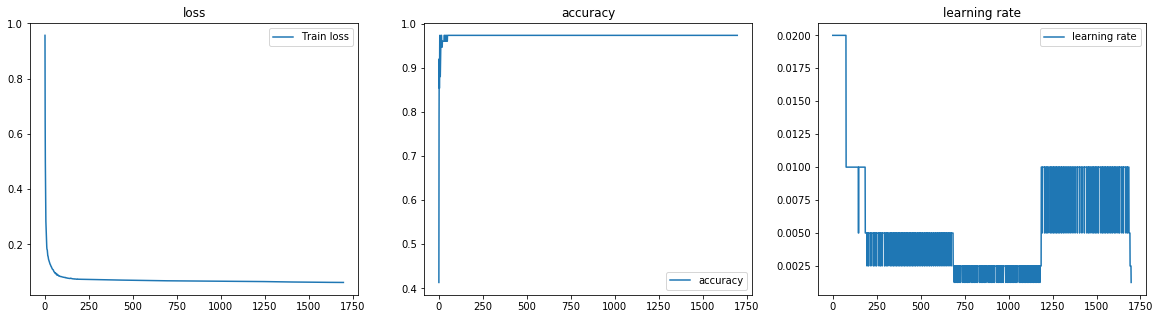

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [47]:
'''
trained gamma
'''
clf.current_gamma()

0.66151035

In [48]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[5.9, 3. , 5.1, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [6. , 3.4, 4.5, 1.6],
       [7.7, 3. , 6.1, 2.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 2.4, 3.7, 1. ],
       [4.7, 3.2, 1.6, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5.7, 2.5, 5. , 2. ],
       [5.7, 2.5, 5. , 2. ],
       [6.1, 2.9, 4.7, 1.4],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 3. , 4.2, 1.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [7.2, 3.6, 6.1, 2.5],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3.2, 1.2, 0.2],
       [4.6, 3.2, 1.4, 0.2]], dtype=float32)

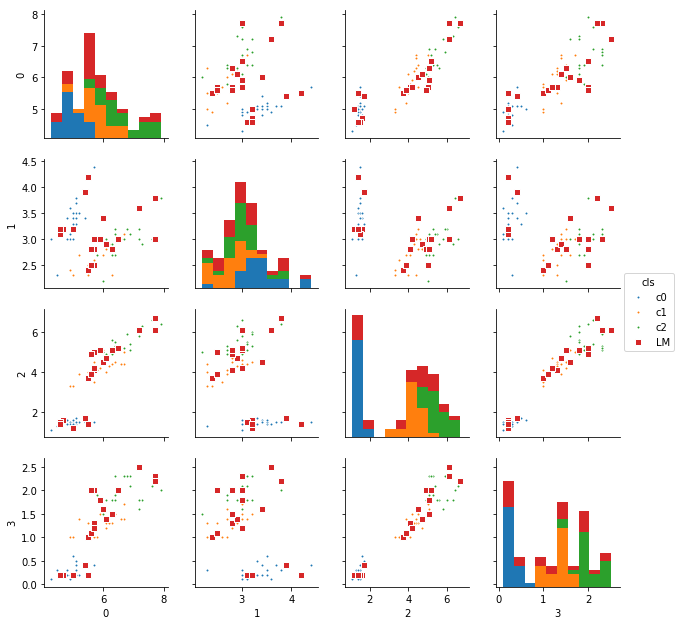

In [49]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [50]:
clf.predict_proba(xtest)[:5]

array([[9.9997616e-01, 1.8756768e-05, 5.1508309e-06],
       [9.9996281e-01, 2.7990793e-05, 9.1914781e-06],
       [9.9997616e-01, 1.8774233e-05, 5.1632392e-06],
       [9.9996281e-01, 2.8202981e-05, 8.9187852e-06],
       [9.9977118e-01, 1.5800953e-04, 7.0811948e-05]], dtype=float32)

In [51]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [52]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [53]:
pred_test = clf.predict(xtest)

In [54]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9866613311991465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 25  0]
 [ 0  1 24]]


## set landmarks automatically on input x
* num_lm = 25

In [55]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True
)

In [56]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=500, verbose=0)

CPU times: user 8.07 s, sys: 257 ms, total: 8.33 s
Wall time: 6.52 s


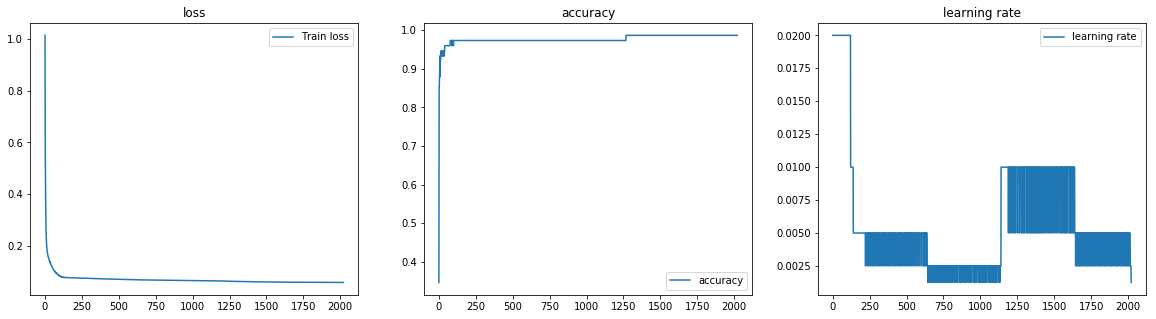

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [58]:
'''
trained gamma
'''
clf.current_gamma()

0.852967

In [59]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.4, 3.3, 1. ],
       [7.2, 3. , 5.8, 1.6],
       [4.5, 2.3, 1.3, 0.3],
       [6.8, 3.2, 5.9, 2.3],
       [6.9, 3.1, 5.4, 2.1],
       [6.6, 3. , 4.4, 1.4],
       [7.6, 3. , 6.6, 2.1],
       [5.7, 2.8, 4.1, 1.3],
       [7.9, 3.8, 6.4, 2. ],
       [7.7, 3. , 6.1, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.2, 2.9, 4.3, 1.3],
       [6.1, 2.8, 4. , 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 3. , 1.6, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.7, 5.3, 1.9],
       [6.4, 3.2, 5.3, 2.3],
       [5. , 3.3, 1.4, 0.2],
       [5. , 2.3, 3.3, 1. ]], dtype=float32)

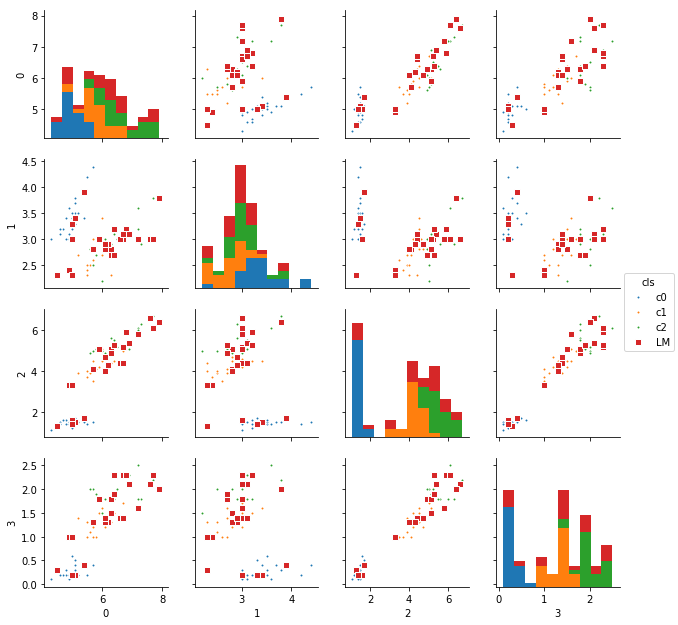

In [60]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [61]:
clf.predict_proba(xtest)[:5]

array([[9.9996829e-01, 4.3425243e-06, 2.7373140e-05],
       [9.9989843e-01, 1.4091261e-05, 8.7502100e-05],
       [9.9995375e-01, 6.3494485e-06, 3.9964609e-05],
       [9.9983418e-01, 2.4003981e-05, 1.4181428e-04],
       [9.9921954e-01, 1.2058566e-04, 6.5990828e-04]], dtype=float32)

In [62]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [63]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [64]:
pred_test = clf.predict(xtest)

In [65]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]


## set initial landmarks manually and train
* num_lm = 15
* train landmarks

In [66]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]
# init_lm = np.c_[
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,))
# ]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    make_model_gkernel=make_model_gkernel3
)

In [67]:
init_lm

array([[6.58755187, 3.70289574, 3.23947001, 0.30428608],
       [7.4527212 , 2.54555202, 2.85217904, 0.46800793],
       [7.55323559, 4.39363075, 4.05257385, 0.53258528],
       [4.31960029, 4.47291101, 3.23501755, 2.12937359],
       [6.49229423, 2.76707768, 3.13006233, 1.60449354],
       [6.51662552, 2.60095423, 2.73046951, 1.72679022],
       [5.00565949, 3.08477023, 5.37327287, 1.38383133],
       [4.50660011, 2.84943102, 2.30070075, 0.17544696],
       [6.58247262, 3.5173208 , 3.67616617, 1.23537833],
       [6.00855969, 3.81015718, 2.07661931, 1.45282517],
       [5.33666971, 3.83133178, 4.51408294, 0.64591255],
       [6.92829586, 3.53956006, 2.34265677, 0.70335938],
       [5.26231335, 3.54421953, 3.39523836, 0.20900141],
       [5.90832527, 3.13999077, 4.68589557, 0.09857467],
       [4.14489938, 3.33229552, 4.06005428, 1.34073023]])

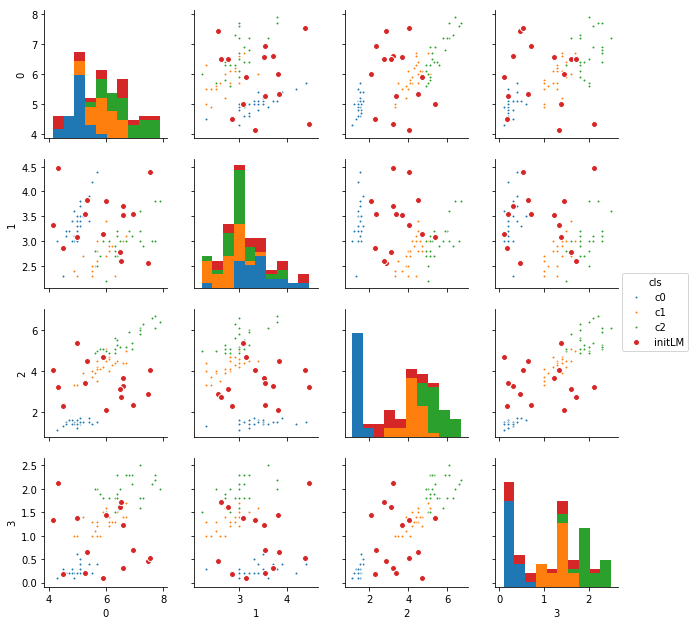

In [68]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [69]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=500, verbose=0)

CPU times: user 10.5 s, sys: 317 ms, total: 10.8 s
Wall time: 8.58 s


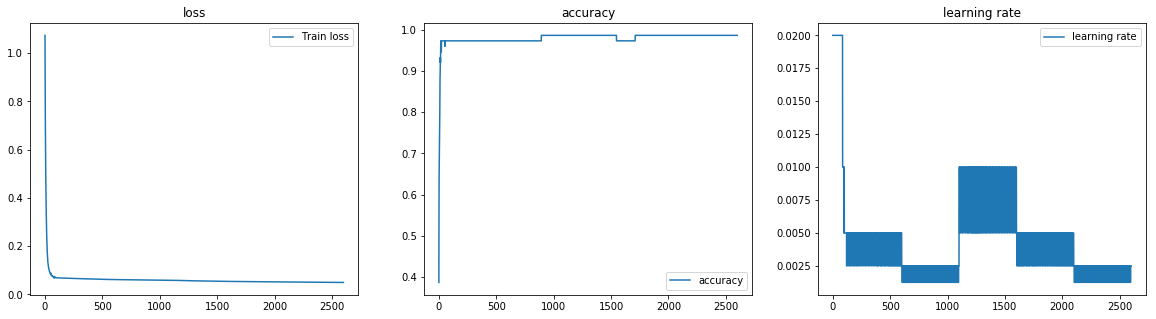

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [71]:
'''
trained gamma
'''
clf.current_gamma()

0.41374683

In [72]:
'''
trained landmarks
'''
lm = clf.current_lm()
lm

array([[7.186697  , 3.5089316 , 4.1264725 , 0.92125416],
       [7.48497   , 3.5262816 , 4.1678553 , 1.1820402 ],
       [6.483679  , 2.7752557 , 5.452188  , 2.7022934 ],
       [5.072243  , 2.929534  , 2.270465  , 0.5071242 ],
       [7.4647546 , 3.5104222 , 3.9889913 , 1.108702  ],
       [5.0733767 , 2.7381563 , 3.9884315 , 0.67374337],
       [4.914501  , 2.777299  , 4.4477105 , 0.7451373 ],
       [5.033607  , 3.5191774 , 1.1563785 , 0.21930881],
       [6.136708  , 2.4785874 , 4.731168  , 2.7246609 ],
       [5.011145  , 3.4131033 , 1.1793363 , 0.24161032],
       [7.062265  , 3.4960864 , 4.068034  , 0.8197411 ],
       [7.6066566 , 3.5138297 , 4.1704826 , 1.3430392 ],
       [5.152538  , 3.6830354 , 1.6060586 , 0.15979823],
       [6.9809012 , 3.1624537 , 6.001995  , 2.5028777 ],
       [4.963826  , 2.764689  , 4.310326  , 0.7526787 ]], dtype=float32)

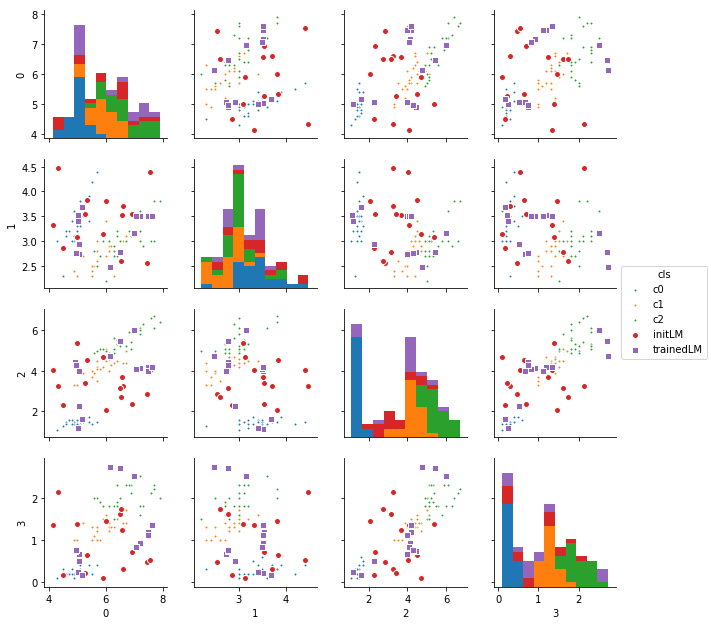

In [73]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [74]:
clf.predict_proba(xtest)[:5]

array([[9.9997187e-01, 1.3815998e-05, 1.4312647e-05],
       [9.9993122e-01, 2.9888135e-05, 3.8881306e-05],
       [9.9996746e-01, 1.4517996e-05, 1.8011166e-05],
       [9.9992704e-01, 3.3003598e-05, 3.9897204e-05],
       [9.9947733e-01, 2.2686868e-04, 2.9578278e-04]], dtype=float32)

In [75]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [76]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [77]:
pred_test = clf.predict(xtest)

In [78]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


## set initial landmarks manually and no train
* num_lm = 15
* train nothing, just activation

In [79]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [80]:
init_lm

array([[7.99659508, 3.89626952, 5.38886016, 2.2966286 ],
       [4.5208375 , 3.54017059, 4.53891718, 0.90784803],
       [6.31328251, 2.56262603, 4.3573333 , 2.05907888],
       [5.2077718 , 2.59191617, 4.16422906, 1.70823972],
       [5.94884926, 3.71420961, 2.31834874, 1.24200773],
       [5.71162697, 2.83809819, 2.2814061 , 0.47883372],
       [7.11360976, 4.0906377 , 4.16797349, 1.95514638],
       [6.73995084, 3.65374273, 4.41457294, 1.60780761],
       [4.59314751, 2.50608392, 3.95687824, 0.62234858],
       [6.62737087, 3.48165427, 4.23964621, 1.21317723],
       [6.90194696, 3.630464  , 2.86676314, 1.02202269],
       [6.9528274 , 2.58466518, 3.48922158, 1.34882818],
       [7.90909886, 2.58015738, 5.93562718, 0.88161574],
       [5.36328504, 4.2801478 , 4.34590684, 2.02082752],
       [7.66904349, 2.99266116, 5.31537431, 0.62859436]])

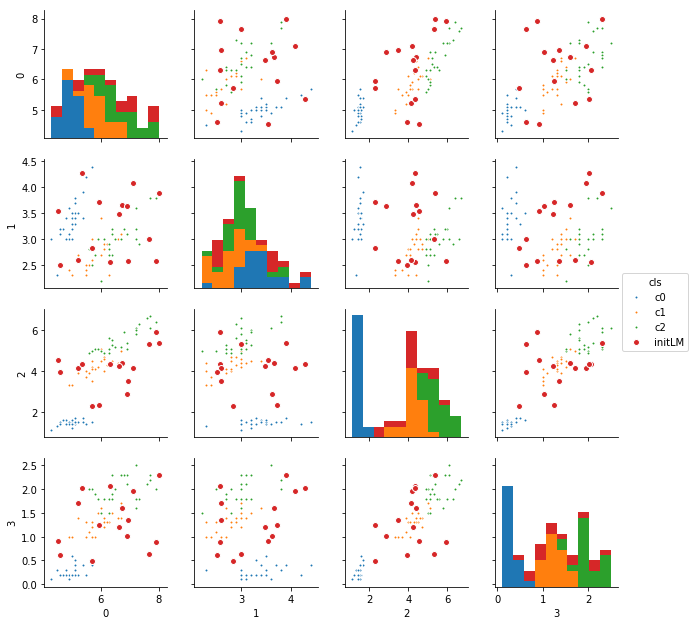

In [81]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [82]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=500, verbose=0)

CPU times: user 10.3 s, sys: 293 ms, total: 10.6 s
Wall time: 8.18 s


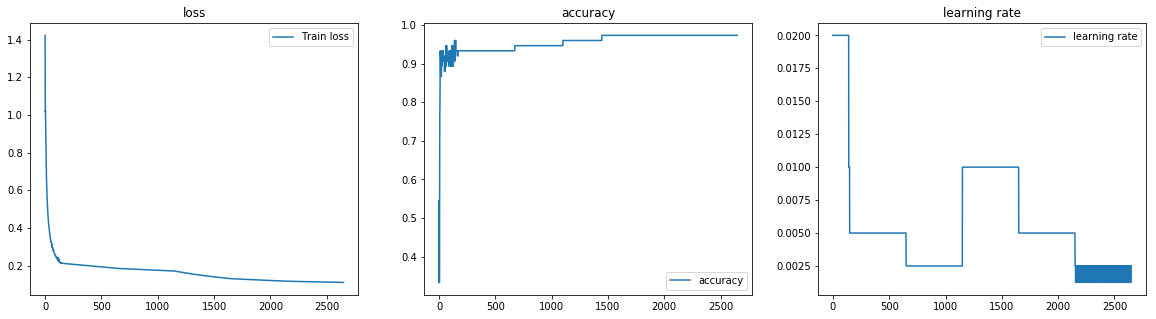

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [84]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [85]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [86]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[7.996595  , 3.8962696 , 5.38886   , 2.2966287 ],
       [4.5208373 , 3.5401707 , 4.538917  , 0.90784806],
       [6.3132825 , 2.5626261 , 4.357333  , 2.059079  ],
       [5.207772  , 2.591916  , 4.164229  , 1.7082397 ],
       [5.948849  , 3.7142096 , 2.3183486 , 1.2420077 ],
       [5.711627  , 2.8380983 , 2.2814062 , 0.4788337 ],
       [7.11361   , 4.0906377 , 4.1679735 , 1.9551464 ],
       [6.7399507 , 3.6537428 , 4.4145727 , 1.6078076 ],
       [4.5931473 , 2.506084  , 3.9568782 , 0.6223486 ],
       [6.627371  , 3.4816542 , 4.2396464 , 1.2131772 ],
       [6.901947  , 3.630464  , 2.866763  , 1.0220227 ],
       [6.9528275 , 2.584665  , 3.4892216 , 1.3488282 ],
       [7.9090986 , 2.5801573 , 5.935627  , 0.88161576],
       [5.363285  , 4.280148  , 4.3459067 , 2.0208275 ],
       [7.6690435 , 2.9926612 , 5.3153744 , 0.62859434]], dtype=float32)

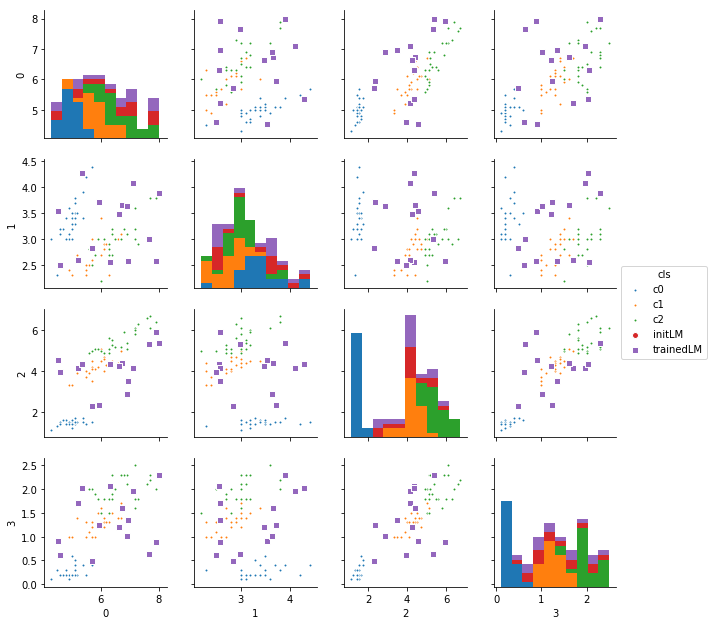

In [87]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [88]:
clf.predict_proba(xtest)[:5]

array([[9.9146384e-01, 8.5332654e-03, 2.8099039e-06],
       [9.9501485e-01, 4.9810247e-03, 4.1569128e-06],
       [9.9253720e-01, 7.4596237e-03, 3.1524087e-06],
       [9.9404001e-01, 5.9546717e-03, 5.2949240e-06],
       [9.9480188e-01, 5.1895352e-03, 8.7135295e-06]], dtype=float32)

In [89]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [90]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [91]:
pred_test = clf.predict(xtest)

In [92]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9333066559957316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.88      0.92      0.90        25
           2       0.92      0.88      0.90        25

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

[[25  0  0]
 [ 0 23  2]
 [ 0  3 22]]


## vector input

In [93]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [94]:
init_lm

array([[5.63105969, 4.26322486, 4.40023288, 1.9245832 ],
       [5.43814485, 2.77651099, 5.33486617, 0.69600111],
       [7.29425504, 3.30880407, 5.46011411, 2.47990675],
       [6.81036157, 3.19589812, 3.15875429, 1.45468214],
       [6.80633348, 4.30031049, 4.55045516, 2.0118896 ],
       [7.51017885, 3.23650042, 5.91718843, 0.07674128],
       [7.10000503, 3.93116818, 5.82775013, 2.02461752],
       [5.58567838, 2.94741943, 2.38172522, 1.90383286],
       [4.67674683, 4.1671202 , 3.66589793, 0.71940639],
       [7.121582  , 3.49514112, 5.89002411, 1.54663868],
       [5.03714066, 3.70927577, 5.74475637, 1.33804826],
       [6.77981342, 3.98068676, 3.03408108, 1.60109047],
       [4.09882891, 3.4975279 , 4.40349524, 1.07533599],
       [6.6606383 , 2.85503908, 3.81844878, 0.16744871],
       [7.15658633, 3.89881021, 2.12397275, 0.97461806]])

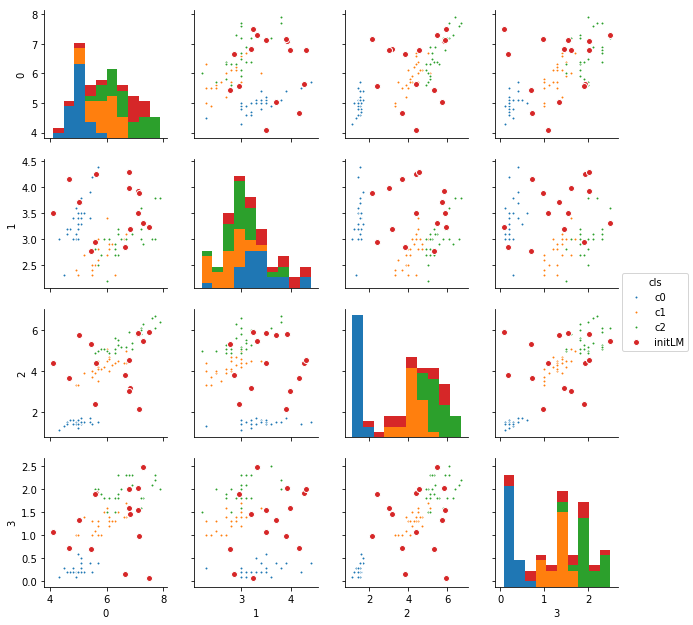

In [95]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [96]:
ytrain[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [97]:
np.argmax(ytrain, axis=1)[:5]

array([0, 0, 0, 0, 0])

In [98]:
%%time
#hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, verbose=0)

CPU times: user 9.24 s, sys: 306 ms, total: 9.54 s
Wall time: 7.27 s


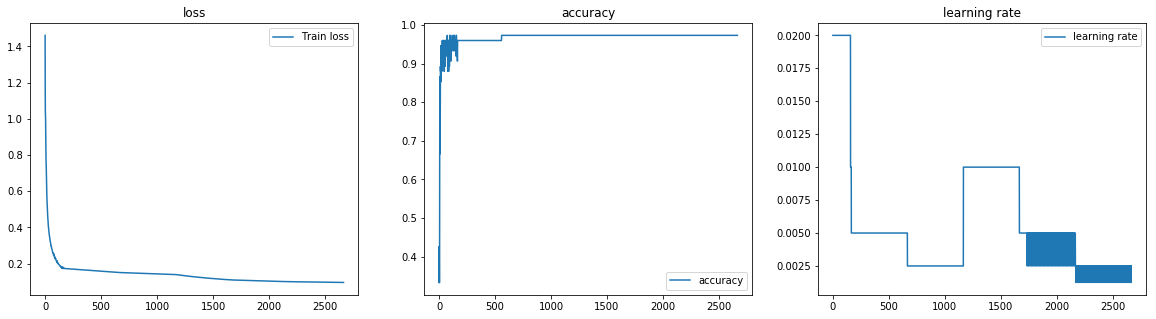

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [100]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [101]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [102]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[5.6310596 , 4.263225  , 4.400233  , 1.9245832 ],
       [5.4381447 , 2.776511  , 5.334866  , 0.6960011 ],
       [7.2942553 , 3.308804  , 5.460114  , 2.4799068 ],
       [6.8103614 , 3.195898  , 3.1587543 , 1.4546821 ],
       [6.8063335 , 4.3003106 , 4.550455  , 2.0118897 ],
       [7.510179  , 3.2365005 , 5.9171886 , 0.07674128],
       [7.100005  , 3.931168  , 5.82775   , 2.0246174 ],
       [5.5856786 , 2.9474194 , 2.3817253 , 1.9038329 ],
       [4.676747  , 4.16712   , 3.6658978 , 0.71940637],
       [7.121582  , 3.495141  , 5.890024  , 1.5466387 ],
       [5.037141  , 3.7092757 , 5.744756  , 1.3380482 ],
       [6.7798133 , 3.9806867 , 3.034081  , 1.6010904 ],
       [4.098829  , 3.4975278 , 4.4034953 , 1.075336  ],
       [6.6606383 , 2.8550391 , 3.8184488 , 0.1674487 ],
       [7.156586  , 3.8988101 , 2.1239727 , 0.9746181 ]], dtype=float32)

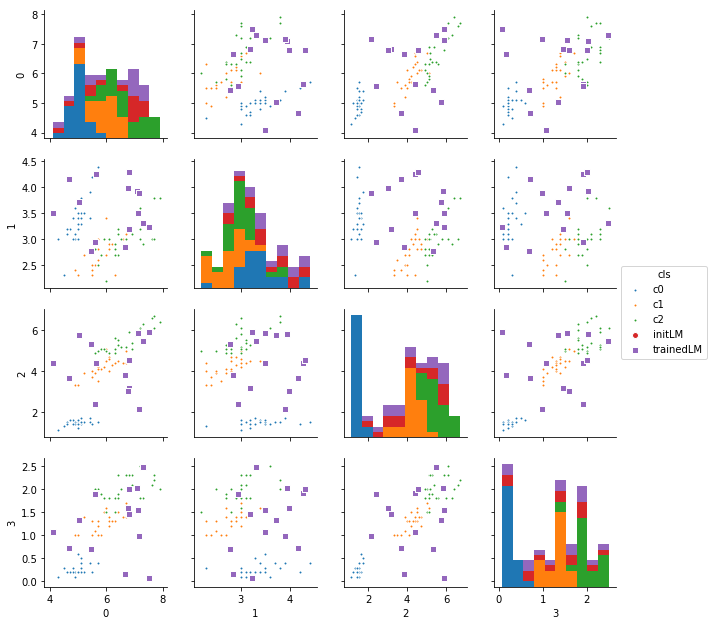

In [103]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [104]:
clf.predict_proba(xtest)[:5]

array([[9.9279648e-01, 7.2027994e-03, 7.4778063e-07],
       [9.9527752e-01, 4.7207624e-03, 1.6840623e-06],
       [9.9331218e-01, 6.6869962e-03, 8.8389220e-07],
       [9.9427420e-01, 5.7239034e-03, 1.9533777e-06],
       [9.9462199e-01, 5.3734230e-03, 4.6251894e-06]], dtype=float32)

In [105]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [106]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [107]:
pred_test = clf.predict(xtest)

In [108]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9465811965811964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      0.96      0.92        25
           2       0.96      0.88      0.92        25

   micro avg       0.95      0.95      0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]


## Regressor

In [109]:
est = RBFRegressor(
    num_lm=30,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 30)],
    make_model_gkernel=make_model_gkernel3
)
# est = RBFRegressor(
#     num_lm=10,
#     lm=xtrain[:10],
#     make_model_gkernel=make_model_gkernel3,
#     loss='mae'
# )

In [110]:
%%time
#hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, verbose=0)

CPU times: user 4.74 s, sys: 135 ms, total: 4.87 s
Wall time: 4.02 s


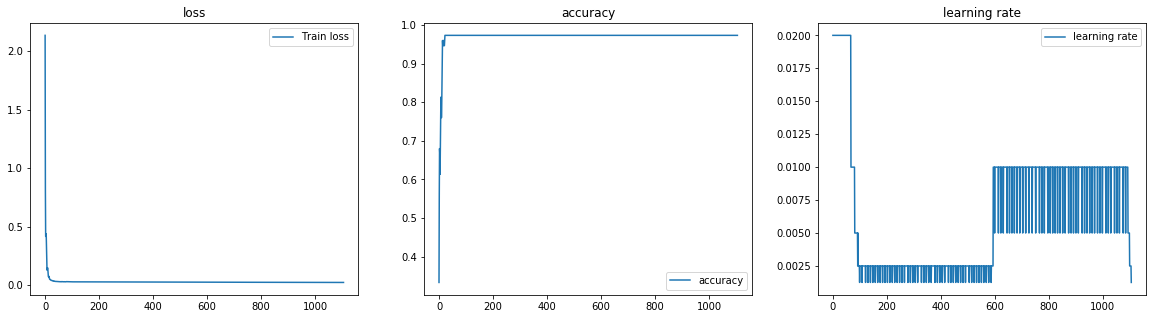

In [111]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [112]:
est.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 30)                121       
_________________________________________________________________
model_out (Model)            (None, 1)                 31        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [113]:
est.predict(xtrain)

array([-2.05124319e-02,  6.28373027e-03,  3.75479460e-03, -4.71806526e-03,
        9.01070237e-03,  2.16714144e-02,  1.57935023e-02,  7.53992796e-03,
       -3.21670473e-02, -1.65927410e-02, -2.74627209e-02,  6.07860684e-02,
        5.15207946e-02,  1.05679035e-04,  2.66820490e-02,  1.57377124e-02,
        1.27812028e-02, -4.88051772e-02,  1.75619125e-03, -1.21742487e-03,
        3.11106443e-03,  5.33461571e-06, -2.66401768e-02, -8.91196728e-03,
       -2.32750475e-02,  1.01699209e+00,  1.11323619e+00,  1.08816195e+00,
        9.29823458e-01,  1.03320801e+00,  1.06226730e+00,  1.20131147e+00,
        8.78851295e-01,  8.66914570e-01,  9.95470047e-01,  9.49180543e-01,
        1.03965092e+00,  9.35013413e-01,  1.54506171e+00,  1.00757349e+00,
        1.00707614e+00,  1.71362603e+00,  1.04099274e+00,  1.11472332e+00,
        1.08284640e+00,  1.11120653e+00,  9.69681382e-01,  8.86898220e-01,
        9.45793509e-01,  1.00858259e+00,  2.00635386e+00,  2.02126265e+00,
        2.01897073e+00,  

In [114]:
est.__dict__

{'build_fn': <function gkernel.sklearn.make_model>,
 'model': <keras.engine.training.Model at 0x7f82506af630>,
 'sk_params': {'activation': 'linear',
  'callbacks': None,
  'lm': array([[5.6, 2.8, 4.9, 2. ],
         [5. , 3. , 1.6, 0.2],
         [5.6, 2.8, 4.9, 2. ],
         [4.9, 3. , 1.4, 0.2],
         [6.7, 3. , 5. , 1.7],
         [7.6, 3. , 6.6, 2.1],
         [7.3, 2.9, 6.3, 1.8],
         [6. , 3.4, 4.5, 1.6],
         [5. , 3.5, 1.6, 0.6],
         [6.1, 2.8, 4. , 1.3],
         [5.2, 3.5, 1.5, 0.2],
         [5. , 3.4, 1.5, 0.2],
         [5.6, 2.8, 4.9, 2. ],
         [4.6, 3.1, 1.5, 0.2],
         [5. , 3. , 1.6, 0.2],
         [5.5, 2.3, 4. , 1.3],
         [6.3, 2.3, 4.4, 1.3],
         [6.1, 2.8, 4.7, 1.2],
         [5.2, 3.5, 1.5, 0.2],
         [5.7, 2.5, 5. , 2. ],
         [6. , 3.4, 4.5, 1.6],
         [6.7, 3.1, 4.4, 1.4],
         [7.7, 3.8, 6.7, 2.2],
         [7.6, 3. , 6.6, 2.1],
         [6.4, 2.7, 5.3, 1.9],
         [5.6, 2.5, 3.9, 1.1],
         [6.5, 3.

In [115]:
est.score(xtrain, np.argmax(ytrain, axis=1))

75/75 [==============================] - 0s 2ms/step


-0.021946903318166733

In [116]:
est.score(xtest, np.argmax(yans, axis=1))

75/75 [==============================] - 0s 59us/step


-0.03351659153898557